<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/Colab/Predict_final_exam_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 (17/05/2021)</b></h1>
 
## **1. YÊU CẦU:**

- Data discovery


## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Predict_final_exam_score.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Predict_final_exam_score.ipynb)
- Link GitHub dataset: [Dataset](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/17_05_2021)

## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện pandas: https://pandas.pydata.org/docs/

### **4.2. Code**

#### **4.2.1. Thêm thư viện, đọc dữ liệu**

In [50]:
# Thêm các thư viện cần thiết
import os
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
 
# Đường dẫn thư mục dataset
dir_dataset_folder = "/content/CS114.L21/Colab/CSV/17_05_2021/"
 
# Nếu không có đường dẫn thì clone từ GitHub về
if not os.path.exists(dir_dataset_folder):
    !git clone https://github.com/caohungphu/CS114.L21.git

In [51]:
# Đọc dữ liệu từ file CSV
wecode_data = pd.read_csv("/content/CS114.L21/Colab/CSV/17_05_2021/wecode.csv")
score_training_data = pd.read_csv("/content/CS114.L21/Colab/CSV/17_05_2021/score_training.csv")

In [52]:
wecode_data.head(10)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
5,9,0,5,4,0,Compilation Error,0,100,solution-5,2,2020-10-30 11:16:57,2020-10-30 11:16:58
6,10,0,6,4,1,SCORE,10000,100,solution-6,2,2020-10-30 11:18:47,2020-10-30 11:18:55
7,11,0,7,4,1,SCORE,10000,100,solution-7,2,2020-10-30 11:20:07,2020-10-30 11:20:15
8,12,0,8,4,1,SCORE,10000,100,solution-8,2,2020-10-30 11:21:02,2020-10-30 11:21:10
9,13,0,9,4,1,SCORE,10000,100,solution-9,2,2020-10-30 11:21:36,2020-10-30 11:21:44


In [53]:
wecode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [54]:
score_training_data.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [55]:
score_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [56]:
# Lấy những cột cần thiết
wecode_data_new = wecode_data[['user_id', 'assignment_id', 'problem_id', 'is_final', 'status', 'pre_score', 'coefficient']]
score_training_data_new = score_training_data[['id', 'CK']]

In [57]:
wecode_data_new.head(10)

,user_id,assignment_id,problem_id,is_final,status,pre_score,coefficient
0,4,0,3,1,SCORE,10000,100
1,4,0,4,1,SCORE,10000,100
2,4,0,5,0,Compilation Error,0,100
3,4,0,5,0,Compilation Error,0,100
4,4,0,5,0,Compilation Error,0,100
5,4,0,5,0,Compilation Error,0,100
6,4,0,6,1,SCORE,10000,100
7,4,0,7,1,SCORE,10000,100
8,4,0,8,1,SCORE,10000,100
9,4,0,9,1,SCORE,10000,100


In [58]:
wecode_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   is_final       264606 non-null  int64 
 4   status         264605 non-null  object
 5   pre_score      264606 non-null  int64 
 6   coefficient    264606 non-null  object
dtypes: int64(5), object(2)
memory usage: 14.1+ MB


In [59]:
score_training_data_new.head(10)

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
5,30,9
6,34,6.5
7,35,4.5
8,36,7
9,37,7.5


In [60]:
score_training_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   CK      974 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.4+ KB


#### **4.2.2. Tiền xử lí dữ liệu**

In [61]:
# Hàm kiểm tra code đã solved chưa
def checkSolved(data):
  if (data['is_final'] == 1) and (data['pre_score'] == 10000):
    return 1
  return 0

# Thêm cột với điều kiện solved vào data
wecode_data_new['solved'] = wecode_data_new.apply(checkSolved, axis=1)

# Xóa những dòng duplicate của cùng 1 user giống problem_id nhưng khác assignment (Chắc do Practice)
# VD: user_id: 1868
wecode_data_new = wecode_data_new.drop_duplicates(subset=['user_id', 'problem_id', 'solved'])

In [62]:
# Góm nhóm những người cùng user_id để tính các giá trị cần thiết mới
groupByUserID = wecode_data_new.groupby(by='user_id', sort = True)

wecode_data_new_header = pd.DataFrame({
    # Số assignment_tries
    'assignment_tries': groupByUserID['assignment_id'].nunique(),  
    # Số problem_tries 
    'problem_tries': groupByUserID['problem_id'].nunique(),
    # Số problem_solved 
    'problem_solved': groupByUserID['solved'].apply(lambda x: (x==1).sum())
})

# Thay index: user_id thành index mới và user_id thành một cột giá trị user_id
wecode_data_new_header = wecode_data_new_header.reset_index()

In [63]:
# Đếm số assignment và problem
number_of_assignment = wecode_data_new['assignment_id'].nunique()
number_of_problem = wecode_data_new['problem_id'].nunique()
# Thêm cột solved_per_tries
wecode_data_new_header['solved_per_tries'] = wecode_data_new_header['problem_solved'] / wecode_data_new_header['problem_tries']
# Thêm cột problem_tries_per_problem
wecode_data_new_header['problem_tries_per_problems'] = wecode_data_new_header['problem_tries'] / number_of_problem
# Thêm cột assignment_tries_per_assignments
wecode_data_new_header['assignment_tries_per_assignments'] = wecode_data_new_header['assignment_tries'] / number_of_assignment
# P/s: 3 giá trị của cột trên gần = 1 là tốt

In [64]:
wecode_data_new_header

,user_id,assignment_tries,problem_tries,problem_solved,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments
0,1,1,2,1,0.500000,0.003155,0.003448
1,4,1,41,37,0.902439,0.064669,0.003448
2,5,4,5,3,0.600000,0.007886,0.013793
3,6,4,88,84,0.954545,0.138801,0.013793
4,7,1,2,0,0.000000,0.003155,0.003448
...,...,...,...,...,...,...,...
1154,1860,9,43,26,0.604651,0.067823,0.031034
1155,1862,2,6,4,0.666667,0.009464,0.006897
1156,1864,5,63,28,0.444444,0.099369,0.017241
1157,1865,3,17,10,0.588235,0.026814,0.010345


In [65]:
# Thay header cho trùng với dữ liệu wecode
score_training_data_new.columns = ['user_id', 'CK']
# Thay đổi từ Object sang Numberic
score_training_data_new['CK'] = score_training_data_new['CK'].apply(pd.to_numeric, errors='coerce')

In [66]:
# Tạo 2 dataframe mới từ bộ dữ liệu điểm CK bị thiếu
score_train = score_training_data_new.dropna(how='any')
score_predict = score_training_data_new[score_training_data_new.isna().any(axis=1)]

# Thay giá trị index chạy từ 0
score_train = score_train.reset_index()
score_train = score_train.drop(columns=['index'])
score_predict = score_predict.reset_index()
score_predict = score_predict.drop(columns=['index'])

In [67]:
score_train.head(10)

,user_id,CK
0,22,8.5
1,24,9.5
2,27,10.0
3,28,9.5
4,29,8.5
5,30,9.0
6,34,6.5
7,35,4.5
8,36,7.0
9,37,7.5


In [68]:
score_predict.head(10)

,user_id,CK
0,51,NaN
1,240,NaN
2,391,NaN
3,513,NaN
4,586,NaN
5,705,NaN
6,750,NaN
7,772,NaN
8,774,NaN
9,776,NaN


In [69]:
# Merge data với bộ dataset Wecode
training_data = pd.merge(score_train, wecode_data_new_header, how='inner', on='user_id')
predict_data = pd.merge(score_predict, wecode_data_new_header, how='inner', on='user_id')

In [70]:
training_data.head(10)

,user_id,CK,assignment_tries,problem_tries,problem_solved,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments
0,24,9.5,15,78,72,0.923077,0.123028,0.051724
1,27,10.0,2,5,3,0.600000,0.007886,0.006897
2,29,8.5,13,80,72,0.900000,0.126183,0.044828
3,34,6.5,11,84,81,0.964286,0.132492,0.037931
4,35,4.5,25,147,140,0.952381,0.231861,0.086207
5,37,7.5,12,102,93,0.911765,0.160883,0.041379
6,40,8.0,14,191,186,0.973822,0.301262,0.048276
7,41,8.0,10,71,61,0.859155,0.111987,0.034483
8,42,7.5,30,181,179,0.988950,0.285489,0.103448
9,43,6.0,15,98,94,0.959184,0.154574,0.051724


In [71]:
predict_data.head(10)

,user_id,CK,assignment_tries,problem_tries,problem_solved,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments
0,51,NaN,5,39,38,0.974359,0.061514,0.017241
1,240,NaN,15,123,113,0.918699,0.194006,0.051724
2,391,NaN,14,111,101,0.909910,0.175079,0.048276
3,513,NaN,15,135,127,0.940741,0.212934,0.051724
4,586,NaN,15,124,120,0.967742,0.195584,0.051724
5,705,NaN,14,114,114,1.000000,0.179811,0.048276
6,772,NaN,13,91,85,0.934066,0.143533,0.044828
7,774,NaN,14,99,98,0.989899,0.156151,0.048276
8,776,NaN,13,98,97,0.989796,0.154574,0.044828
9,792,NaN,15,102,100,0.980392,0.160883,0.051724


#### **4.2.3. Visualize data**

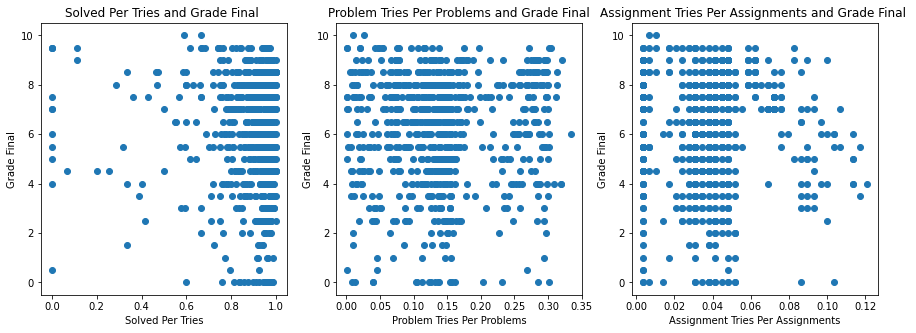

In [92]:
import matplotlib.pyplot as plt
fig, (axs1, axs2, axs3, ) = plt.subplots(1,3, figsize = (15,5))
axs1.scatter(x = training_data['solved_per_tries'], y = training_data['CK'].sort_values())


axs1.set_title("Solved Per Tries and Grade Final ")
axs1.set(xlabel='Solved Per Tries', ylabel='Grade Final')


axs2.scatter(x = training_data['problem_tries_per_problems'], y = training_data['CK'].sort_values())


axs2.set_title("Problem Tries Per Problems and Grade Final")
axs2.set(xlabel='Problem Tries Per Problems', ylabel='Grade Final')

axs3.scatter(x = training_data['assignment_tries_per_assignments'], y = training_data['CK'].sort_values())


axs3.set_title("Assignment Tries Per Assignments and Grade Final ")
axs3.set(xlabel='Assignment Tries Per Assignments', ylabel='Grade Final')
plt.show()

#### **4.2.3. Thử nghiệm dữ liệu với SVR**

In [72]:
# Chuẩn bị model và xem kết quả training
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = np.array(training_data[['solved_per_tries', 'problem_tries_per_problems', 'assignment_tries_per_assignments']])
y = np.array(training_data['CK'])

clf = SVR().fit(X, y)
y_predict = clf.predict(X)

print("MSE:",mean_squared_error(y, y_predict))

MSE: 4.5655449907437635


In [73]:
# Dự đoán điểm cuối kỳ còn thiếu
predict_data['CK'] = clf.predict(predict_data[['solved_per_tries', 'problem_tries_per_problems', 'assignment_tries_per_assignments']])
predict_data

,user_id,CK,assignment_tries,problem_tries,problem_solved,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments
0,51,6.113199,5,39,38,0.974359,0.061514,0.017241
1,240,6.784797,15,123,113,0.918699,0.194006,0.051724
2,391,6.613539,14,111,101,0.909910,0.175079,0.048276
3,513,7.034409,15,135,127,0.940741,0.212934,0.051724
4,586,6.940828,15,124,120,0.967742,0.195584,0.051724
5,705,6.918280,14,114,114,1.000000,0.179811,0.048276
6,772,6.416426,13,91,85,0.934066,0.143533,0.044828
7,774,6.658253,14,99,98,0.989899,0.156151,0.048276
8,776,6.675329,13,98,97,0.989796,0.154574,0.044828
9,792,6.641391,15,102,100,0.980392,0.160883,0.051724


In [74]:
# Làm tròn điểm số cuối kỳ
def x_round(x):
    x = round(x*2)/2
    return x

predict_data['CK'] = x_round(predict_data['CK'])
predict_data

,user_id,CK,assignment_tries,problem_tries,problem_solved,solved_per_tries,problem_tries_per_problems,assignment_tries_per_assignments
0,51,6.0,5,39,38,0.974359,0.061514,0.017241
1,240,7.0,15,123,113,0.918699,0.194006,0.051724
2,391,6.5,14,111,101,0.909910,0.175079,0.048276
3,513,7.0,15,135,127,0.940741,0.212934,0.051724
4,586,7.0,15,124,120,0.967742,0.195584,0.051724
5,705,7.0,14,114,114,1.000000,0.179811,0.048276
6,772,6.5,13,91,85,0.934066,0.143533,0.044828
7,774,6.5,14,99,98,0.989899,0.156151,0.048276
8,776,6.5,13,98,97,0.989796,0.154574,0.044828
9,792,6.5,15,102,100,0.980392,0.160883,0.051724


## **5. NHẬN XÉT VÀ TRẢ LỜI YÊU CẦU ĐỀ BÀI**

### **5.1. Nhận xét**


### **5.2. Trả lời yêu cầu đề bài**
